# Kernels in sci-kit learn - Lab

## Introduction

In this lab, you'll explore applying several types of kernels on some more visual data. At the end of the lab, you'll then apply your knowledge of SVMs to a real world dataset!

## Objectives

You will be able to:
- Create a non-linear SVM in scikit-learn
- Interpret the results of your SVM in scikit-learn
- Apply SVM to a real-world data set


## The data

To start, reexamine the final datasets from the previous lab.

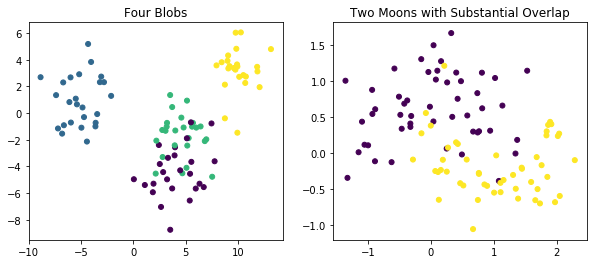

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn import svm
from sklearn.model_selection import train_test_split

import numpy as np

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Four Blobs")
X_3, y_3 = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1.6, random_state = 123)
plt.scatter(X_3[:, 0], X_3[:, 1], c = y_3, s=25)

plt.subplot(122)
plt.title("Two Moons with Substantial Overlap")
X_4, y_4 = make_moons(n_samples=100, shuffle = False , noise = 0.3, random_state=123)
plt.scatter(X_4[:, 0], X_4[:, 1], c = y_4, s=25)

plt.show()

## Explore the RBF kernel

Recall how a radial basis function kernel has 2 hyperparameters: `C` and `gamma`. To further investigate tuning, you'll generate 9 subplots with varying parameter values and plot the resulting decision boundaries. Take a look at this [example from sci-kit learn](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html) as inspiration. Each of the 9 plots should look like this:

![](images/SVM_rbf.png)

Note that the score represents the percentage of correctly classified instances according to the model. 

In [2]:
# Prepare your data for plotting
# separate X-axis and Y-axis coordinates
X1= X_4[:,0]
X2= X_4[:,1]

# find min and max values for X & Y axes
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

# generate a coordinate grid using min/max values
x1_coord = np.linspace(X1_min, X1_max, 10)
x2_coord = np.linspace(X2_min, X2_max, 10)

X1_C, X2_C = np.meshgrid(x1_coord, x2_coord)

#reshape the grid to make it plottable coordinates
x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

In [14]:
# Create a loop that builds a model for each of the 9 combinations
C = [.1, 1, 10]
gam = [.1, 1, 10]
models = []
for c in C:
    for g in gam:
        clf = svm.SVC(kernel = "rbf", C=c, gamma=g) 
        clf.fit(X_4, y_4)
        Z = clf.predict(x1x2).reshape(X1_C.shape)
        score = clf.score(X_4, y_4)
        models.append([clf, Z, c, g, score])

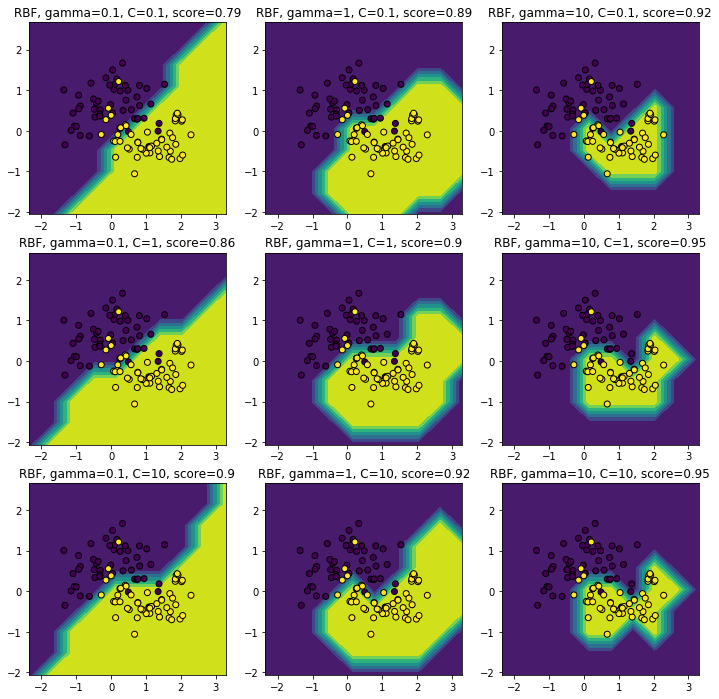

In [18]:
# Plot the prediction results in 9 subplots  
plt.figure(figsize=(12,12))
subplt = 331
for i in models:
    plt.subplot(subplt)
    subplt += 1
    plt.title(f"RBF, gamma={i[3]}, C={i[2]}, score={round(i[4],2)}")
    axes = plt.gca()
    axes.contourf(X1_C, X2_C, i[1], alpha=1)
    plt.scatter(X1, X2, c=y_4, edgecolors='k')

Repeat what you did before but now, use `decision_function` instead of `predict`. What do you see?

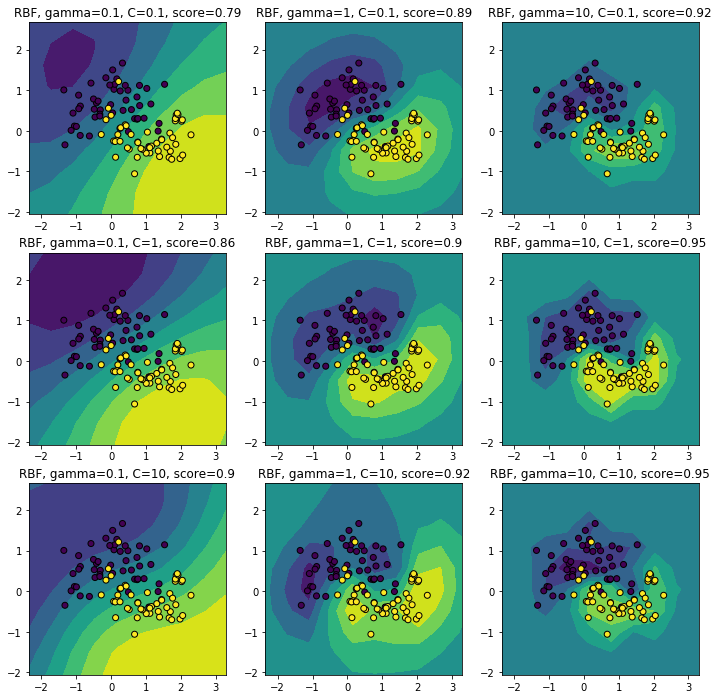

In [19]:
# Plot the decision function results in 9 subplots
plt.figure(figsize=(12,12))
subplt = 331
for i in models:
    df1 = i[0].decision_function(x1x2).reshape(X1_C.shape)
    plt.subplot(subplt)
    subplt += 1
    plt.title(f"RBF, gamma={i[3]}, C={i[2]}, score={round(i[4],2)}")
    axes = plt.gca()
    axes.contourf(X1_C, X2_C, df1, alpha=1)
    plt.scatter(X1, X2, c=y_4, edgecolors='k')

## Explore the Polynomial kernel

Recall that the polynomial kernel has 3 hyperparameters:
- $\gamma$, which can be specified using keyword `gamma`
- $r$, which can be specified using keyword `coef0`
- $d$, which can be specified using keyword `degree`

Build 8 different plots using all the possible combinations between there two values for each:
- $r= 0.1$ and $2$
- $\gamma= 0.1$ and $1$
- $d= 3$ and $4$

Note that `decision_function()` cannot be used on a classifier with more than two classes, so simply use `predict()` again.

In [27]:
# Prepare your data for plotting
# separate X-axis and Y-axis coordinates
X1= X_3[:,0]
X2= X_3[:,1]

# find min and max values for X & Y axes
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

# generate a coordinate grid using min/max values
x1_coord = np.linspace(X1_min, X1_max, 100)   #increasing this gives more detail
x2_coord = np.linspace(X2_min, X2_max, 100)   #increasing this gives more detail

X1_C, X2_C = np.meshgrid(x1_coord, x2_coord)

#reshape the grid to make it plottable coordinates
x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

In [33]:
# Create a loop that builds a model for each of the 8 combinations
coef0 = [.1, 2]
gamma = [.1, 1]
degree = [3, 4]
models = []
for g in gamma:
    for d in degree:
        for r in coef0:
            clf = svm.SVC(kernel="poly", coef0=r, gamma=g, degree=d) 
            clf.fit(X_3, y_3)
            Z = clf.predict(x1x2).reshape(X1_C.shape)
            score = clf.score(X_3, y_3)
            models.append([clf, Z, r, g, d, score])

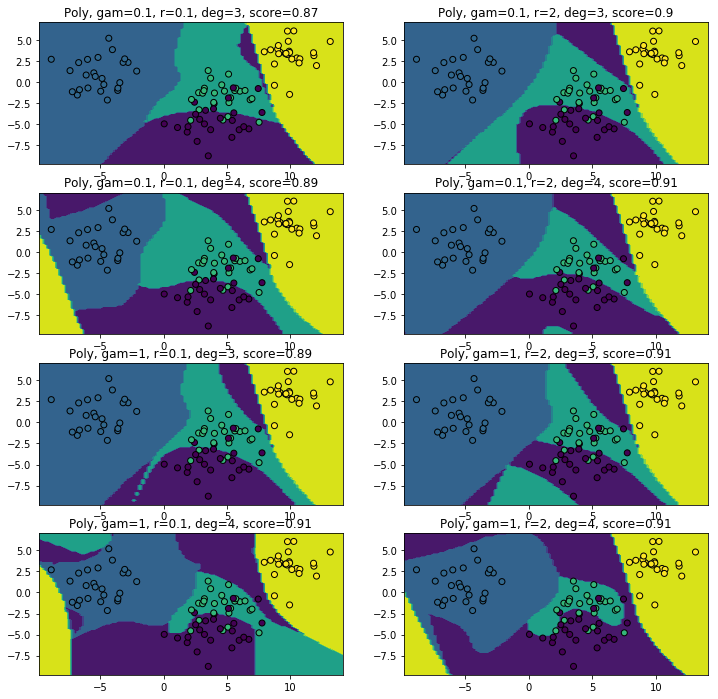

In [34]:
# Plot the prediction results in 8 subplots  
plt.figure(figsize=(12,12))
subplt = 421
for i in models:
    plt.subplot(subplt)
    subplt += 1
    plt.title(f"Poly, gam={i[3]}, r={i[2]}, deg={i[4]}, score={round(i[5],2)}")
    axes = plt.gca()
    axes.contourf(X1_C, X2_C, i[1], alpha=1)
    plt.scatter(X1, X2, c=y_3, edgecolors='k')

## The Sigmoid Kernel

Build a support vector machine using the Sigmoid kernel.

Recall that the sigmoid kernel has 2 hyperparameters:
- $\gamma$, which can be specified using keyword `gamma`
- $r$, which can be specified using keyword `coef0`


Look at 9 solutions using the following values for $\gamma$ and $r$.

- $\gamma= 0.001, 0.01$ and $0.1$
- $r = 0.01, 1$ and $10$

In [36]:
# Prepare your data for plotting
# separate X-axis and Y-axis coordinates
X1= X_3[:,0]
X2= X_3[:,1]

# find min and max values for X & Y axes
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

# generate a coordinate grid using min/max values
x1_coord = np.linspace(X1_min, X1_max, 100)   #increasing this gives more detail
x2_coord = np.linspace(X2_min, X2_max, 100)   #increasing this gives more detail

X1_C, X2_C = np.meshgrid(x1_coord, x2_coord)

#reshape the grid to make it plottable coordinates
x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

In [37]:
# Create a loop that builds a model for each of the 9 combinations
coef0 = [0.01,1, 10]
gamma = [0.001, 0.01, 0.1]
models = []
for g in gamma:
    for r in coef0:
        clf = svm.SVC(kernel="poly", coef0=r, gamma=g) 
        clf.fit(X_3, y_3)
        Z = clf.predict(x1x2).reshape(X1_C.shape)
        score = clf.score(X_3, y_3)
        models.append([clf, Z, r, g, score])

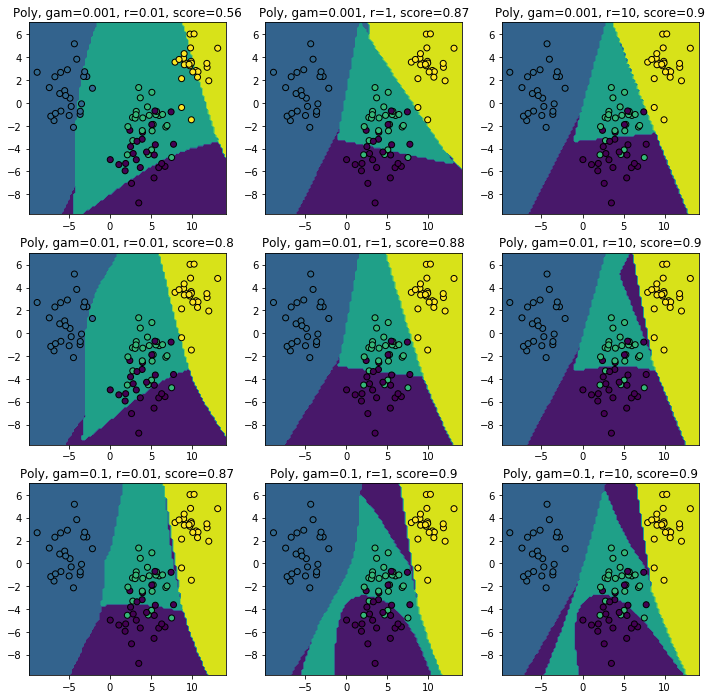

In [38]:
# Plot the prediction results in 9 subplots  
plt.figure(figsize=(12,12))
subplt = 331
for i in models:
    plt.subplot(subplt)
    subplt += 1
    plt.title(f"Poly, gam={i[3]}, r={i[2]}, score={round(i[4],2)}")
    axes = plt.gca()
    axes.contourf(X1_C, X2_C, i[1], alpha=1)
    plt.scatter(X1, X2, c=y_3, edgecolors='k')

## What is your conclusion here?

- The polynomial kernel is very sensitive to the hyperparameter settings. Especially setting a "wrong" gamma can have a dramatic effect on the model performance
- Our experiments with the Polynomial kernel were more successful

## Explore the Polynomial Kernels again, yet now performing a train-test-split

Explore the same parameters you did before when exploring polynomial kernels
- Do a train test split of 2/3 train vs 1/3 test. 
- Train the model on the training set, plot the result and the accuracy score.
- Next, plot the model with the test set and the resulting accuracy score. Make some notes for yourself on training vs test performance and selecting an appropriate model based on these results.


In [64]:
# Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=(1/3), random_state=123)

# Prepare your data for plotting
# separate X-axis and Y-axis coordinates
X1= X_train[:,0]
X2= X_train[:,1]

# find min and max values for X & Y axes
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

# generate a coordinate grid using min/max values
x1_coord = np.linspace(X1_min, X1_max, 500)   #increasing this gives more detail
x2_coord = np.linspace(X2_min, X2_max, 500)   #increasing this gives more detail

X1_C, X2_C = np.meshgrid(x1_coord, x2_coord)

#reshape the grid to make it plottable coordinates
x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

In [65]:
# Create a loop that builds a model for each of the 8 combinations
coef0 = [.1, 2]
gamma = [.1, 1]
degree = [3, 4]
models = []
for g in gamma:
    for d in degree:
        for r in coef0:
            clf = svm.SVC(kernel="poly", coef0=r, gamma=g, degree=d) 
            clf.fit(X_train, y_train)
            Z = clf.predict(x1x2).reshape(X1_C.shape)
            score = clf.score(X_train, y_train)
            models.append([clf, Z, r, g, d, score])

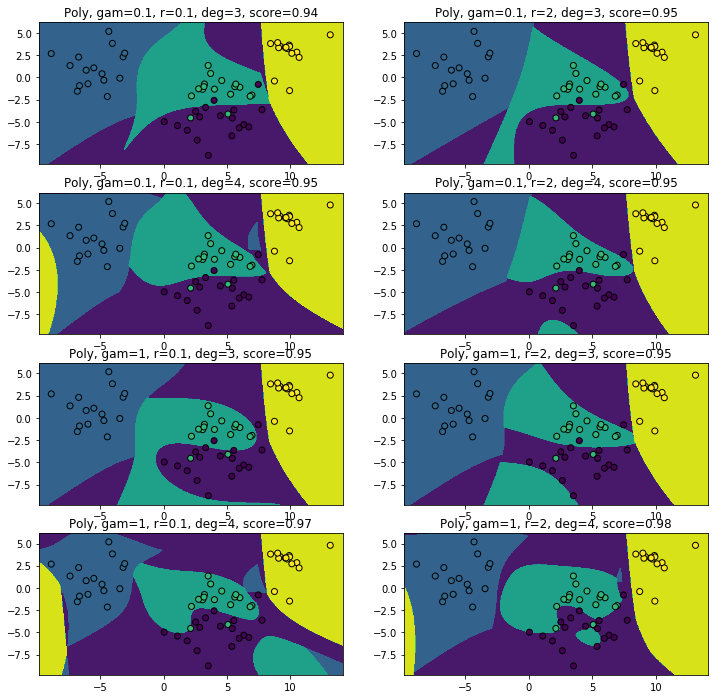

In [66]:
# Plot the prediction results in 8 subplots on the training set  
plt.figure(figsize=(12,12))
subplt = 421

for i in models:
    plt.subplot(subplt)
    subplt += 1
    plt.title(f"Poly, gam={i[3]}, r={i[2]}, deg={i[4]}, score={round(i[5],2)}")
    axes = plt.gca()
    axes.contourf(X1_C, X2_C, i[1], alpha=1)
    plt.scatter(X1, X2, c=y_train, edgecolors='k')

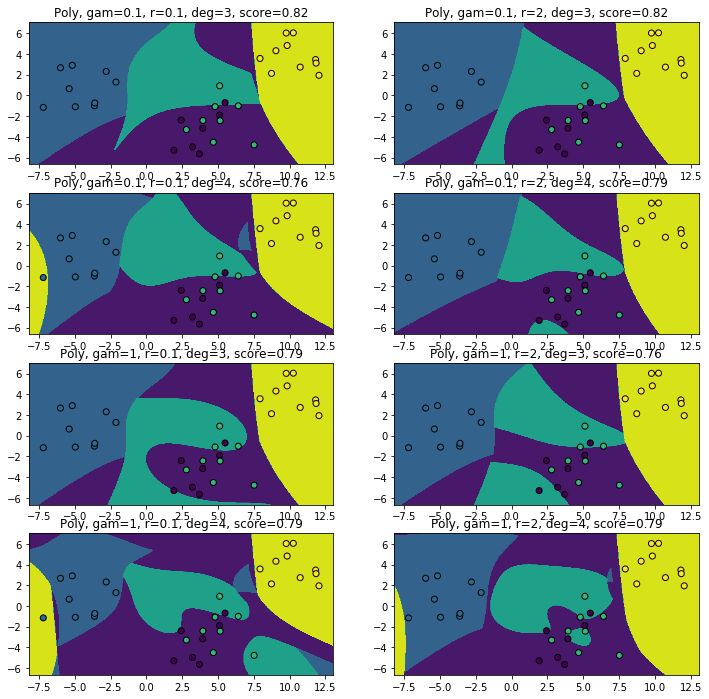

In [67]:
# Now plot the prediction results for the test set
plt.figure(figsize=(12,12))
subplt = 421

X1= X_test[:,0]
X2= X_test[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1
x1_coord = np.linspace(X1_min, X1_max, 500)   #increasing this gives more detail
x2_coord = np.linspace(X2_min, X2_max, 500)   #increasing this gives more detail

X1_C, X2_C = np.meshgrid(x1_coord, x2_coord)

#reshape the grid to make it plottable coordinates
x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

for i in models:
    plt.subplot(subplt)
    subplt += 1
    plt.title(f"Poly, gam={i[3]}, r={i[2]}, deg={i[4]}, score={round(i[0].score(X_test, y_test), 2)}")
    axes = plt.gca()
    axes.contourf(X1_C, X2_C, i[1], alpha=1)
    plt.scatter(X1, X2, c=y_test, edgecolors='k')

## A higher-dimensional, real world data set

Until now, you've only explored data sets with 2 features to make it easy to visualize the decision boundary. Remember that you can use Support Vector Machines on a wide range of classification data sets, with more than 2 features. While you will no longer be able to visually represent decision boundaries (at least, if you have more than 3 feature spaces), you'll still be able to make predictions.

To do this, you'll use the salaries dataset again (in `salaries_final.csv`). 

This dataset has 6 predictors:

- `Age`: continuous.

- `Education`: Categorical. Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- `Occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- `Relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- `Race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- `Sex`: Female, Male.

Simply run the code below to import and preview the dataset. Be sure to note the data type produced by`dmatrices`. `dmatrices` is often used for preprocessing data with continuous and categorical predictors.

In [68]:
import statsmodels as sm
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
salaries = pd.read_csv("salaries_final.csv", index_col = 0)
salaries.head()

,Age,Education,Occupation,Relationship,Race,Sex,Target
0,39,Bachelors,Adm-clerical,Not-in-family,White,Male,<=50K
1,50,Bachelors,Exec-managerial,Husband,White,Male,<=50K
2,38,HS-grad,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,53,11th,Handlers-cleaners,Husband,Black,Male,<=50K
4,28,Bachelors,Prof-specialty,Wife,Black,Female,<=50K


In [69]:
target = pd.get_dummies(salaries.Target, drop_first=True)
xcols = salaries.columns[:-1]
data = pd.get_dummies(salaries[xcols], drop_first=True)

Now build a simple linear SVM using this data. Note that using SVC, some slack is automatically allowed, so the data doesn't have to be perfectly linearly separable.

- Create a train-test-split of 75-25
- Make sure that you set "probability = True"
- after you ran the model, make probability predictions on the test set, and calculate the classification accuracy score

In [ ]:
data_train, data_test, target_train, target_test = train_test_split(data, target, 
                                                                   test_size = 0.25, random_state=123)
import time
start_time = time.time()
clf = svm.SVC(probability=True)
clf.fit(data_train, target_train['>50K'])
total =(time.time() - start_time)
total/60

In [ ]:
clf.predict_proba(data_test)

In [ ]:
clf.score(data_test, target_test['>50K'])

> Warning: It takes quite a while to compute this! The score is slightly better than the best result obtained using decision trees, but at the cost of computational resources. Changing kernels can make computation times even longer.

## Summary

Great, you've got plenty of practice in on Support Vector Machines! In this lab you explored kernels and applying SVMs to real-life data!